Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 2.0

In [1]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

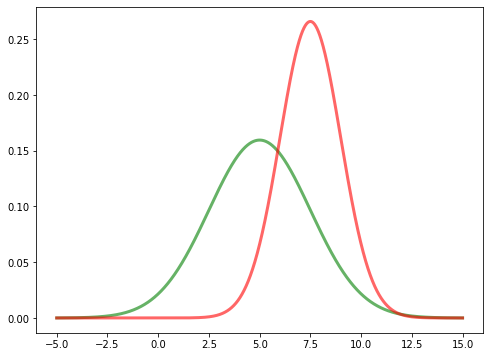

In [2]:
fig = plt.figure(figsize = (8,6))

# Distribuciones
f1 = stats.norm(loc = 5, scale = 2.5)
f2 = stats.norm(loc = 7.5, scale = 1.5)
x = np.linspace(-5,15,10000)

# Gráficas
plt.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
plt.plot(x, f2.pdf(x),'r-', lw = 3, alpha = 0.6, label='pdf 2')

plt.show()

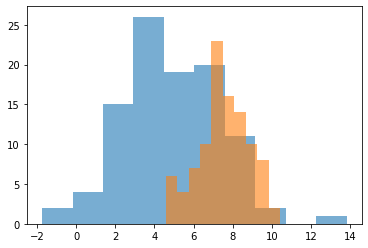

In [3]:
figsize = (8,6)

# Histogramas de 100 datos
data1 = f1.rvs(100)
data2 = f2.rvs(100)

plt.hist(data1, alpha = 0.6)
plt.hist(data2, alpha = 0.6)

plt.show()

In [4]:
# Dataframe
dic = {'Y(labels)':np.concatenate((np.zeros(len(data1)),np.ones(len(data2)))), 'X_1(feature)':np.concatenate((data1,data2))}
df = pd.DataFrame(dic)
df

,Y(labels),X_1(feature)
0,0.0,5.274764
1,0.0,5.155632
2,0.0,1.498903
3,0.0,2.287547
4,0.0,3.049431
5,0.0,3.125880
6,0.0,4.183681
7,0.0,3.830108
8,0.0,1.393464
9,0.0,6.695252


In [5]:
# Datos de test
data1test = f1.rvs(25)
data2test = f2.rvs(25)

dictest = {'Y(labels)':np.concatenate((np.zeros(len(data1test)),np.ones(len(data2test)))), 'X_1(feature)':np.concatenate((data1test,data2test))}
df_test = pd.DataFrame(dictest)
df_test


,Y(labels),X_1(feature)
0,0.0,8.267459
1,0.0,0.521007
2,0.0,0.366911
3,0.0,4.947731
4,0.0,4.318479
5,0.0,5.845051
6,0.0,6.559000
7,0.0,7.017216
8,0.0,6.250264
9,0.0,2.996237


### Regresión lineal

In [6]:
clf = LinearRegression()

# Datos de entrenamiento
Xtrain = df['X_1(feature)'].values
Ytrain = df['Y(labels)'].values

# Datos de test
Xcv = df_test['X_1(feature)'].values
Ycv = df_test['Y(labels)'].values

clf.fit(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,1)))

scoreT = clf.score(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,1)))
scoreCV = clf.score(np.reshape(Xcv, (50,1)), np.reshape(Ycv, (50,1)))
print('Score datos de entrenamiento: ', scoreT, '\n','  Score datos de validación: ', scoreCV )

Score datos de entrenamiento:  0.3174190308146211 
   Score datos de validación:  0.45698740779936875


### Decision tree classifier

In [7]:
sklearn.tree.DecisionTreeClassifier(max_depth=3)
clf = SVC(kernel="linear", C=0.025)
clf.fit(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,1)))

scoreT = clf.score(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,1)))
scoreCV = clf.score(np.reshape(Xcv, (50,1)), np.reshape(Ycv, (50,1)))
print('Score datos de entrenamiento: ', scoreT, '\n','  Score datos de validación: ', scoreCV )

Score datos de entrenamiento:  0.765 
   Score datos de validación:  0.78


/home/usuario/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random forest classifier

In [8]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

CV_rfc.fit(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,)))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [9]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [10]:
best = RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'], criterion= CV_rfc.best_params_['criterion'], max_depth= CV_rfc.best_params_['max_depth'], max_features=CV_rfc.best_params_['max_features'])
best.fit(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,)))

scoreT = clf.score(np.reshape(Xtrain, (200,1)), np.reshape(Ytrain, (200,1)))
scoreCV = clf.score(np.reshape(Xcv, (50,1)), np.reshape(Ycv, (50,1)))
print('Score datos de entrenamiento: ', scoreT, '\n','  Score datos de validación: ', scoreCV )

Score datos de entrenamiento:  0.765 
   Score datos de validación:  0.78


### Curvas de aprendiazaje

In [11]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [12]:
X30 = df.sample(30)
X100 = df.sample(100)
X200 = df.sample(200)

<module 'matplotlib.pylab' from '/home/usuario/anaconda3/lib/python3.7/site-packages/matplotlib/pylab.py'>

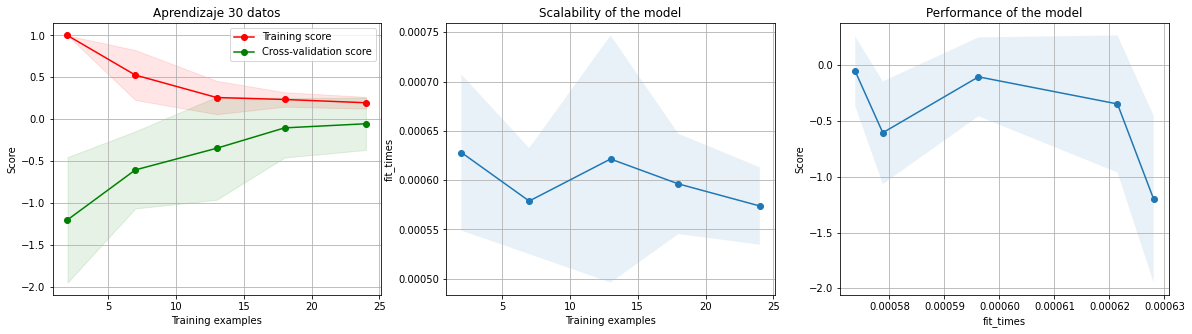

In [13]:
plot_learning_curve(
    LinearRegression(),
    'Aprendizaje 30 datos',
    np.array(X30['X_1(feature)']).reshape(-1,1),
    np.array(X30['Y(labels)']).reshape(-1,),
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),)

<module 'matplotlib.pylab' from '/home/usuario/anaconda3/lib/python3.7/site-packages/matplotlib/pylab.py'>

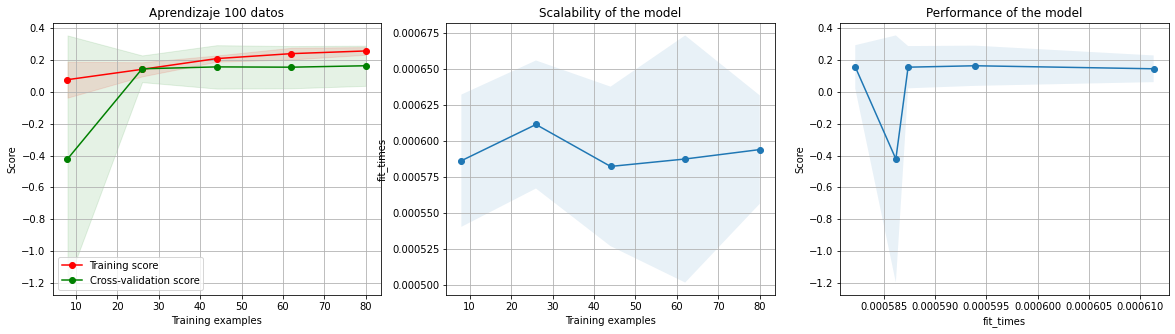

In [14]:
plot_learning_curve(
    LinearRegression(),
    'Aprendizaje 100 datos',
    np.array(X100['X_1(feature)']).reshape(-1,1),
    np.array(X100['Y(labels)']).reshape(-1,),
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),)

<module 'matplotlib.pylab' from '/home/usuario/anaconda3/lib/python3.7/site-packages/matplotlib/pylab.py'>

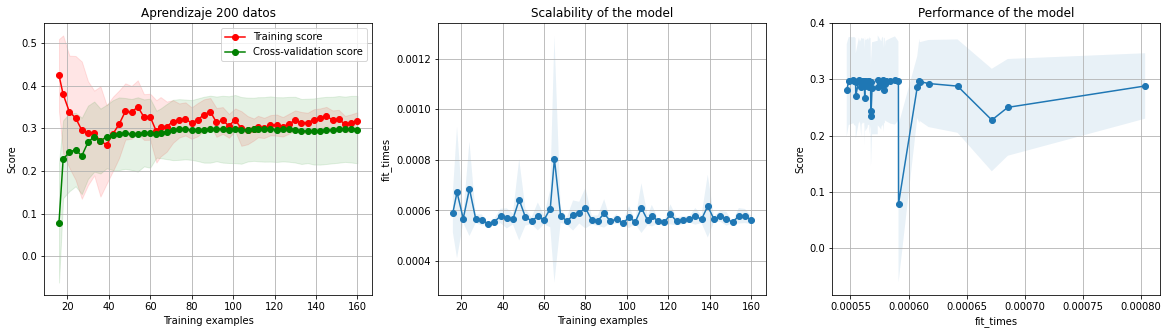

In [15]:
plot_learning_curve(
    LinearRegression(),
    'Aprendizaje 200 datos',
    np.array(X200['X_1(feature)']).reshape(-1,1),
    np.array(X200['Y(labels)']).reshape(-1,),
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 50),)